In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.cluster import KMeans

In [2]:
# load dataset

In [3]:
paris_ab = pd.read_csv("Listing_AirBnB_Paris.csv")
paris_ab

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.831910,2.318700,Entire home/apt,150.0,2,4,2019-10-24,0.05,1,327,0,7511409139079
1,5396,Rental unit in Paris · ★4.59 · Studio · 1 bed ...,7903,Borzou,NaN,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,146.0,1,374,2023-12-11,2.12,2,0,48,7510402838018
2,7397,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Franck,NaN,Hôtel-de-Ville,48.859090,2.353150,Entire home/apt,140.0,10,343,2023-11-16,2.22,7,198,22,7510400829623
3,7964,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,22155,Anaïs,NaN,Opéra,48.874170,2.342450,Entire home/apt,180.0,7,5,2015-09-14,0.03,1,25,0,7510903576564
4,9359,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,28422,Bernadette,NaN,Louvre,48.860060,2.348630,Entire home/apt,75.0,180,0,NaN,NaN,1,185,0,"Available with a mobility lease only (""bail mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74324,1043629451440755792,Rental unit in Paris · ★New · Studio · 1 bed ·...,50308796,Anais,NaN,Ménilmontant,48.868059,2.407307,Entire home/apt,52.0,1,0,NaN,NaN,1,100,0,7512010784549
74325,1043707020977346344,Rental unit in Paris · ★New · 1 bedroom · 1 be...,18385602,Stanislas,NaN,Buttes-Montmartre,48.891719,2.335972,Entire home/apt,500.0,1,0,NaN,NaN,1,27,0,7511810784902
74326,1043932119757241230,Rental unit in Paris · ★New · 3 bedrooms · 4 b...,335998296,Studioprestige,NaN,Entrepôt,48.874650,2.355466,Entire home/apt,324.0,1,0,NaN,NaN,121,362,0,7511505605678
74327,1043947326757240041,Rental unit in Paris · ★New · 1 bedroom · 2 be...,503331047,John,NaN,Élysée,48.869724,2.318358,Entire home/apt,85.0,1,0,NaN,NaN,30,290,0,7510810007394


In [4]:
paris_ab.shape

(74329, 18)

In [5]:
paris_ab['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [6]:
paris_ab['neighbourhood'].unique()

array(['Observatoire', 'Hôtel-de-Ville', 'Opéra', 'Louvre', 'Popincourt',
       'Buttes-Montmartre', 'Entrepôt', 'Vaugirard', 'Luxembourg',
       'Gobelins', 'Bourse', 'Buttes-Chaumont', 'Temple', 'Reuilly',
       'Élysée', 'Panthéon', 'Batignolles-Monceau', 'Ménilmontant',
       'Palais-Bourbon', 'Passy'], dtype=object)

In [7]:
paris_ab.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 74329 entries, 0 to 74328
,Data columns (total 18 columns):
, #   Column                          Non-Null Count  Dtype  
,---  ------                          --------------  -----  
, 0   id                              74329 non-null  int64  
, 1   name                            74329 non-null  object 
, 2   host_id                         74329 non-null  int64  
, 3   host_name                       74320 non-null  object 
, 4   neighbourhood_group             0 non-null      float64
, 5   neighbourhood                   74329 non-null  object 
, 6   latitude                        74329 non-null  float64
, 7   longitude                       74329 non-null  float64
, 8   room_type                       74329 non-null  object 
, 9   price                           67108 non-null  float64
, 10  minimum_nights                  74329 non-null  int64  
, 11  number_of_reviews               74329 non-null  int64  
, 12  last_review    

In [8]:
# check null values

In [9]:
paris_ab.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             9
neighbourhood_group               74329
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              7221
minimum_nights                        0
number_of_reviews                     0
last_review                       17891
reviews_per_month                 17891
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           19642
dtype: int64

In [10]:
# data cleaning

In [11]:
paris_ab_df = paris_ab.drop(columns = ['id', 'host_id', 'host_name', 'neighbourhood_group', 'latitude', 'longitude', 'last_review', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'license'])
paris_ab_df.head()

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,Observatoire,Entire home/apt,150.0,2,4,0.05,327
1,Rental unit in Paris · ★4.59 · Studio · 1 bed ...,Hôtel-de-Ville,Entire home/apt,146.0,1,374,2.12,0
2,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,Hôtel-de-Ville,Entire home/apt,140.0,10,343,2.22,198
3,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,Opéra,Entire home/apt,180.0,7,5,0.03,25
4,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,Louvre,Entire home/apt,75.0,180,0,NaN,185


In [12]:
paris_ab_df.isnull().sum()

name                     0
neighbourhood            0
room_type                0
price                 7221
minimum_nights           0
number_of_reviews        0
reviews_per_month    17891
availability_365         0
dtype: int64

In [13]:
# drop missing values

In [14]:
paris_ab_df.dropna(inplace = True)

In [15]:
# extract review score from 'name' column

In [16]:
def extract_review_score(name):
    match = re.search(r'★(\d+\.\d+)', name)
    if match:
        return float(match.group(1))
    return None

In [17]:
paris_ab_df['review_score'] = paris_ab_df['name'].apply(extract_review_score)

In [18]:
def extract_bedrooms(name):
    match = re.search(r'(\d+)\s*bedroom', name, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

def extract_beds(name):
    match = re.search(r'(\d+)\s*bed', name, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

def extract_bathrooms(name):
    match = re.search(r'(\d+)\s*bath', name, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

In [19]:
paris_ab_df['bedroom'] = paris_ab_df['name'].apply(extract_bedrooms)
paris_ab_df['bed'] = paris_ab_df['name'].apply(extract_beds)
paris_ab_df['bathroom'] = paris_ab_df['name'].apply(extract_bathrooms)

In [20]:
paris_ab_df

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,review_score,bedroom,bed,bathroom
0,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,Observatoire,Entire home/apt,150.0,2,4,0.05,327,5.00,1.0,1.0,1.0
1,Rental unit in Paris · ★4.59 · Studio · 1 bed ...,Hôtel-de-Ville,Entire home/apt,146.0,1,374,2.12,0,4.59,NaN,1.0,1.0
2,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,Hôtel-de-Ville,Entire home/apt,140.0,10,343,2.22,198,4.73,2.0,2.0,1.0
3,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,Opéra,Entire home/apt,180.0,7,5,0.03,25,4.80,1.0,1.0,1.0
5,Rental unit in Paris · ★4.92 · 1 bedroom · 1 b...,Popincourt,Entire home/apt,130.0,4,49,0.37,169,4.92,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73949,Rental unit in Paris · ★New · 1 bedroom · 2 be...,Luxembourg,Entire home/apt,225.0,1,1,1.00,343,NaN,1.0,1.0,1.0
74017,Rental unit in Paris · ★New · 1 bedroom · 2 be...,Entrepôt,Entire home/apt,105.0,1,1,1.00,133,NaN,1.0,1.0,1.0
74035,Rental unit in Paris · ★New · 1 bedroom · 1 be...,Batignolles-Monceau,Entire home/apt,70.0,2,1,1.00,363,NaN,1.0,1.0,1.0
74058,Rental unit in Paris · ★New · 1 bedroom · 1 be...,Passy,Entire home/apt,122.0,3,1,1.00,268,NaN,1.0,1.0,1.0


In [21]:
# paris_ab_df.isnull().sum()

In [22]:
paris_ab_df['bedroom'].fillna(0, inplace=True)

/var/folders/6q/k8jdwbv174s78xj3x3kzvn0w0000gn/T/ipykernel_11754/787842860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
,The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.
,
,For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.
,
,
,  paris_ab_df['bedroom'].fillna(0, inplace=True)


In [23]:
paris_ab_df_new = paris_ab_df.drop(columns = ['name'])

In [24]:
paris_ab_df_new

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,review_score,bedroom,bed,bathroom
0,Observatoire,Entire home/apt,150.0,2,4,0.05,327,5.00,1.0,1.0,1.0
1,Hôtel-de-Ville,Entire home/apt,146.0,1,374,2.12,0,4.59,0.0,1.0,1.0
2,Hôtel-de-Ville,Entire home/apt,140.0,10,343,2.22,198,4.73,2.0,2.0,1.0
3,Opéra,Entire home/apt,180.0,7,5,0.03,25,4.80,1.0,1.0,1.0
5,Popincourt,Entire home/apt,130.0,4,49,0.37,169,4.92,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
73949,Luxembourg,Entire home/apt,225.0,1,1,1.00,343,NaN,1.0,1.0,1.0
74017,Entrepôt,Entire home/apt,105.0,1,1,1.00,133,NaN,1.0,1.0,1.0
74035,Batignolles-Monceau,Entire home/apt,70.0,2,1,1.00,363,NaN,1.0,1.0,1.0
74058,Passy,Entire home/apt,122.0,3,1,1.00,268,NaN,1.0,1.0,1.0


In [25]:
paris_ab_df_new.isnull().sum()

neighbourhood           0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month       0
availability_365        0
review_score         8858
bedroom                 0
bed                   108
bathroom             5312
dtype: int64

In [26]:
paris_ab_df_new.dropna(inplace = True)

In [27]:
paris_ab_df_new.shape

(39196, 11)

In [28]:
paris_ab_df_new['price'].median()

130.0

In [29]:
# detect and handle outlier

In [118]:
median_price = paris_ab_df_new['price'].median()
mad_price = (paris_ab_df_new['price'] - median_price).abs().median()

lower_bound = median_price - 2 * mad_price
upper_bound = median_price + 1 * mad_price

price_outliers = paris_ab_df_new[(paris_ab_df_new['price'] < lower_bound) | (paris_ab_df_new['price'] > upper_bound)]

In [119]:
lower_bound, upper_bound

(34.0, 178.0)

In [120]:
paris_ab_df_cleaned = paris_ab_df_new[(paris_ab_df_new['price'] >= lower_bound) & (paris_ab_df_new['price'] <= upper_bound)]
paris_ab_df_cleaned

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,review_score,bedroom,bed,bathroom
0,Observatoire,Entire home/apt,150.0,2,4,0.05,327,5.00,1.0,1.0,1.0
1,Hôtel-de-Ville,Entire home/apt,146.0,1,374,2.12,0,4.59,0.0,1.0,1.0
2,Hôtel-de-Ville,Entire home/apt,140.0,10,343,2.22,198,4.73,2.0,2.0,1.0
5,Popincourt,Entire home/apt,130.0,4,49,0.37,169,4.92,1.0,1.0,1.0
6,Buttes-Montmartre,Entire home/apt,80.0,30,51,0.30,102,4.85,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
72831,Élysée,Entire home/apt,118.0,2,3,3.00,225,4.67,1.0,1.0,1.0
72936,Buttes-Montmartre,Entire home/apt,68.0,1,4,4.00,20,5.00,1.0,1.0,1.0
73277,Passy,Entire home/apt,106.0,1,3,3.00,159,5.00,1.0,1.0,1.0
73347,Popincourt,Entire home/apt,115.0,1,3,3.00,128,5.00,2.0,2.0,1.0


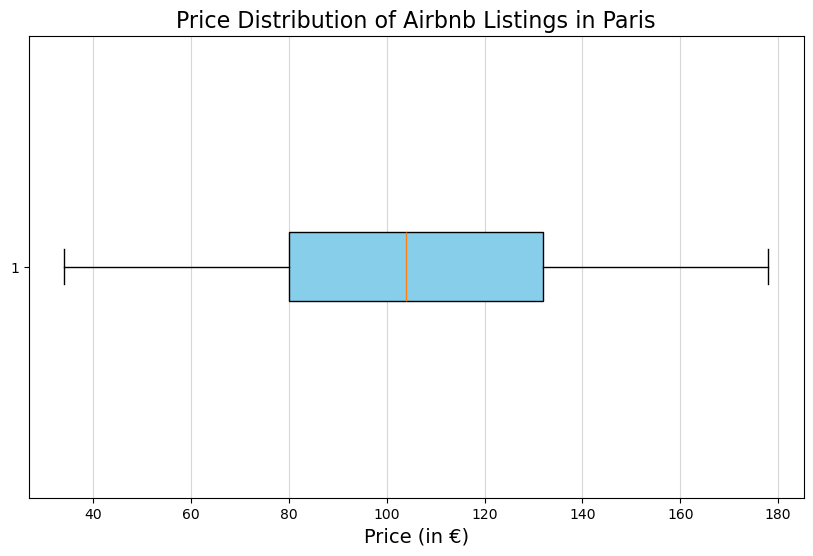

In [121]:
plt.figure(figsize=(10, 6))
plt.boxplot(paris_ab_df_cleaned['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Price Distribution of Airbnb Listings in Paris', fontsize=16)
plt.xlabel('Price (in €)', fontsize=14)
plt.grid(axis='x', alpha=0.5)
plt.show()

From the price distribution graph, the majority of listings have prices clustered towards the lower end, with a few higher-priced outliers. Almost all of the airbnb price in Paris are below €1,0000, with most below about €1,000. 

In [122]:
# view price distribution based on room types

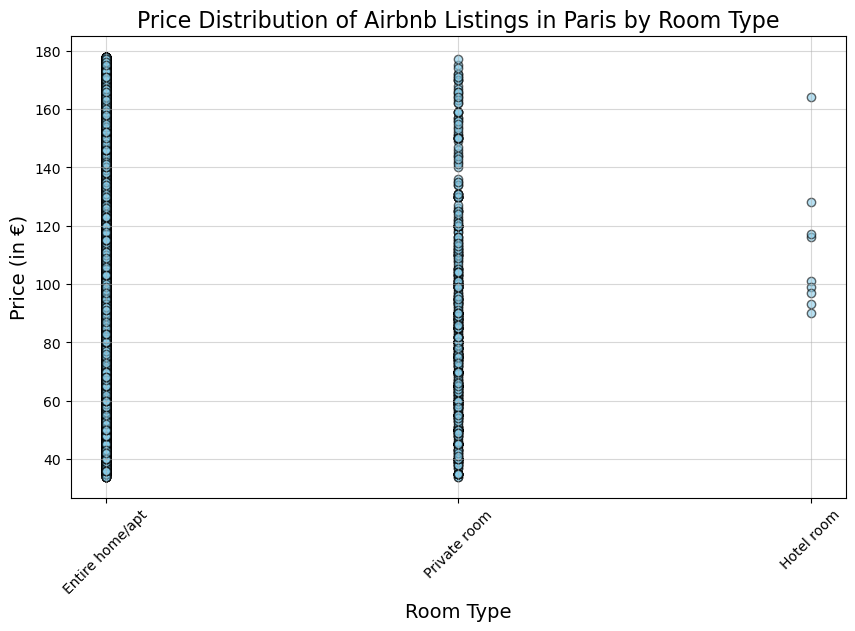

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(paris_ab_df_cleaned['room_type'], paris_ab_df_cleaned['price'], 
                      alpha=0.6, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Airbnb Listings in Paris by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price (in €)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.show()

The plot shows that "Entire home/apt" listings tend to have a broader price range, which ranges from €0-10,000, with many listings at the lower end but also some higher-priced listings. "Private rooms" generally have lower prices, and "Shared rooms" have the lowest price range.

In [124]:
# view price distribution in top 10 neighborhood.

<Figure size 1200x600 with 0 Axes>

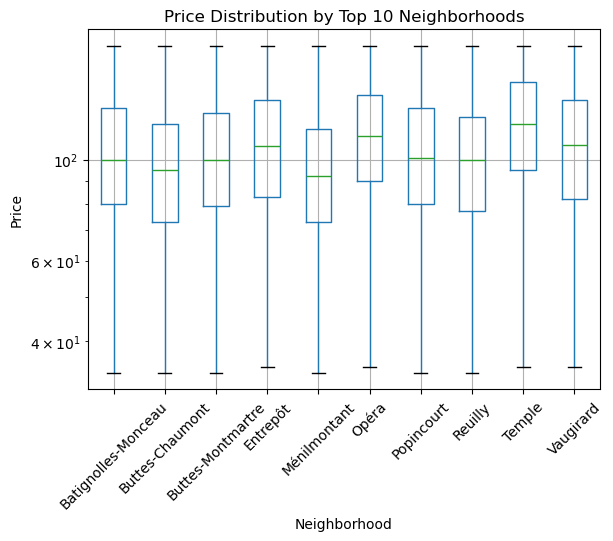

In [125]:
top_neighbourhoods = paris_ab_df_cleaned['neighbourhood'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
paris_ab_df_cleaned[paris_ab_df_cleaned['neighbourhood'].isin(top_neighbourhoods)].boxplot(column='price', by='neighbourhood', rot=45)
plt.title('Price Distribution by Top 10 Neighborhoods')
plt.suptitle('')  # Remove default title
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.yscale('log')  # Use log scale for better visualization
plt.grid(True)
plt.show()

The box plot illustrates the variation in listing prices across the top 10 neighborhoods. Most of the neighborhoods have a wider range of prices, indicating both budget and luxury listings, while others are more consistent in pricing. The analysis reveals that Passy has a relatively higher average price compared to several other top neighborhoods. 

In [126]:
# view average price in different neighborhood

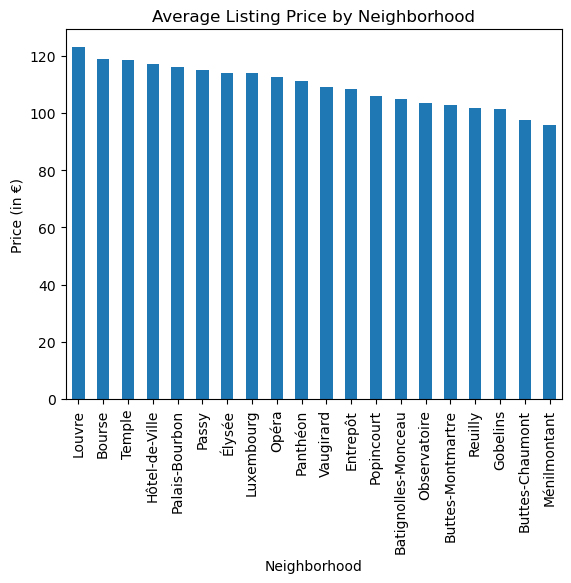

In [127]:
neighbourhood_price = paris_ab_df_cleaned.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)
neighbourhood_price.plot(kind="bar")
plt.title("Average Listing Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Price (in €)")
plt.show()

The bar plot illustrates the average listing prices across all the neighborhoods.  while others are more consistent in pricing. The log scale helps to better observe the spread and outliers.

In [128]:
paris_ab_df_cleaned1 = paris_ab_df_cleaned.drop(columns=['room_type', 'neighbourhood', 'minimum_nights', 'availability_365'])

In [129]:
paris_ab_df_cleaned1.dtypes

price                float64
number_of_reviews      int64
reviews_per_month    float64
review_score         float64
bedroom              float64
bed                  float64
bathroom             float64
dtype: object

In [130]:
# get dummy variables of categorical variables

In [131]:
paris_ab_df_encoded = pd.get_dummies(paris_ab_df_cleaned, columns=['room_type', 'neighbourhood'], drop_first=True)
paris_ab_df_encoded

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,review_score,bedroom,bed,bathroom,room_type_Hotel room,...,neighbourhood_Observatoire,neighbourhood_Opéra,neighbourhood_Palais-Bourbon,neighbourhood_Panthéon,neighbourhood_Passy,neighbourhood_Popincourt,neighbourhood_Reuilly,neighbourhood_Temple,neighbourhood_Vaugirard,neighbourhood_Élysée
0,150.0,2,4,0.05,327,5.00,1.0,1.0,1.0,False,...,True,False,False,False,False,False,False,False,False,False
1,146.0,1,374,2.12,0,4.59,0.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
2,140.0,10,343,2.22,198,4.73,2.0,2.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
5,130.0,4,49,0.37,169,4.92,1.0,1.0,1.0,False,...,False,False,False,False,False,True,False,False,False,False
6,80.0,30,51,0.30,102,4.85,0.0,2.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72831,118.0,2,3,3.00,225,4.67,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,False,True
72936,68.0,1,4,4.00,20,5.00,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
73277,106.0,1,3,3.00,159,5.00,1.0,1.0,1.0,False,...,False,False,False,False,True,False,False,False,False,False
73347,115.0,1,3,3.00,128,5.00,2.0,2.0,1.0,False,...,False,False,False,False,False,True,False,False,False,False


In [132]:
paris_ab_df_encoded.shape

(26684, 30)

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [134]:
# split into train and test model

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X = paris_ab_df_encoded.drop(columns=['price'])
y = paris_ab_df_encoded['price']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

In [139]:
# X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [140]:
# create a pipeline

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [142]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor(random_state=42))  
])

In [143]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [144]:
knn_model = KNeighborsRegressor(n_neighbors=10)

In [145]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [146]:
y_pred = knn_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
,  warnings.warn(


In [147]:
mae, mse, rmse, r2

(25.803859846355632,
 987.2550534007869,
 31.420615102202994,
 0.15375808975161187)

The MAE of 25.80 suggests that, on average, the model's predictions deviate from the actual prices by around 26.44 units (€).<br>
The MSE is 987,  means the average squared erroe between the predicted and the actual is 1047, which is quite far.<br>
The RMSE of 31.42 indicates a higher sensitivity to larger errors, showing that there are some listings where the model significantly misses the mark.<br>
The R² value of 0.15 suggesting that the model explains only about 13% of the variance in the price data. This implies that the model's performance is poor, and there is substantial room for improvement.<br>

In [161]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['minimum_nights', 'reviews_per_month']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['room_type', 'neighbourhood'])
    ])

In [162]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [163]:
model.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [148]:
# try a stacking model

In [149]:
stacking_model = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

In [150]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [151]:
stacking_pred = stacking_model.predict(X_test)

In [152]:
stacking_mae = mean_absolute_error(y_test, stacking_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
stacking_rmse = mean_squared_error(y_test, stacking_pred, squared=False)
stacking_r2 = r2_score(y_test, stacking_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
,  warnings.warn(


In [154]:
stacking_mae, stacking_mse, stacking_rmse, stacking_r2

(22.156514548962374,
 735.6169785367267,
 27.122259834621573,
 0.36945380529204286)